In [38]:
import pandas as pds
import nltk,re,string
from nltk.probability import FreqDist
from collections import defaultdict
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.tokenize.punkt import PunktSentenceTokenizer
from nltk.corpus import stopwords
from string import punctuation
from heapq import nlargest
# import and instantiate CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()    
from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(ngram_range=(1,2),max_df=0.5, min_df=2,stop_words='english')
#train_X = vectorizer.fit_transform(x)  

from sklearn.cluster import KMeans
import sklearn.cluster.k_means_
km = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=1, 
  verbose=True)

In [29]:
from sklearn.cluster import KMeans  #algorithm in sklearn library to do k-means clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np

In [2]:
assessments_loc = "../datasets/assessments.csv"
assessments = pd.read_csv(assessments_loc)

student_assess_loc = "../datasets/studentAssessment.csv"
student_assess = pd.read_csv(student_assess_loc)

student_info_loc = "../datasets/studentInfo.csv"
student_info = pd.read_csv(student_info_loc)

student_reg_loc = "../datasets/studentRegistration.csv"
student_reg = pd.read_csv(student_reg_loc)

student_vle_loc = "../datasets/studentVle.csv"
student_vle = pd.read_csv(student_vle_loc)

vle_loc = "../datasets/vle.csv"
vle = pd.read_csv(vle_loc)

In [3]:
courses_loc = "../datasets/courses.csv"
courses = pd.read_csv(courses_loc)

In [4]:
courses.head(5)

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [5]:
courses2 = courses.copy()
courses2.code_presentation = courses2.code_presentation.apply(lambda x: x if 'J' in x else "")
courses2['code_presentation'].replace('', np.nan, inplace=True)
courses2.dropna(subset=['code_presentation'], inplace=True)
courses2.head(5)

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
6,CCC,2014J,269


In [6]:
removal_list = ['CCC','EEE','GGG']

courses3 = courses2.copy()
courses3.code_module = courses3.code_module.apply(lambda x: x if x not in removal_list else "")
courses3['code_module'].replace('', np.nan, inplace=True)
courses3.dropna(subset=['code_module'], inplace=True)
courses3.head(5)

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
8,DDD,2013J,261


In [9]:
#print(assessments.shape)
#assessments.head()

In [10]:
#assessments.dtypes

In [186]:
#assessments.count()

In [187]:
#print(courses.shape)
#courses.head()


In [188]:
#courses.dtypes

In [189]:
#courses.count()

In [190]:
#print(student_assess.shape)
#student_assess.head()


In [191]:
#student_assess.dtypes

In [192]:
#student_assess.count()

In [193]:
#print(student_info.shape)
#student_info.head()


In [194]:
#student_info.dtypes

In [195]:
#student_info.count()

# using student_reg1 from now on ;)

In [7]:
#print(student_reg.shape)
#student_reg.head()
student_reg1 = student_reg.copy()
student_reg1 = student_reg1.drop("date_unregistration", axis=1)
student_reg1.head()

,code_module,code_presentation,id_student,date_registration
0,AAA,2013J,11391,-159.0
1,AAA,2013J,28400,-53.0
2,AAA,2013J,30268,-92.0
3,AAA,2013J,31604,-52.0
4,AAA,2013J,32885,-176.0


# merge studentAssess & assess in order to drop post-first assessments

In [8]:
df_assess_merge_1 = pd.merge(student_assess, assessments, on="id_assessment")
df_assess_merge_1.sort_values("id_student")
df_assess_merge_1.head(10)

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0
5,1752,45462,20,0,70.0,AAA,2013J,TMA,19.0,10.0
6,1752,45642,18,0,72.0,AAA,2013J,TMA,19.0,10.0
7,1752,52130,19,0,72.0,AAA,2013J,TMA,19.0,10.0
8,1752,53025,9,0,71.0,AAA,2013J,TMA,19.0,10.0
9,1752,57506,18,0,68.0,AAA,2013J,TMA,19.0,10.0


In [9]:
df_assess_merge_1.id_student.value_counts()[:5]

537811     28
554881     26
632074     25
543010     24
2697921    24
Name: id_student, dtype: int64

In [10]:
df = df_assess_merge_1.copy()
df['id_course'] = df['code_module'] + "-" + df['code_presentation']
df = df.drop(['code_module','code_presentation'],axis=1) # 'score','is_banked','weight','date'
df = df.sort_values("id_student")
df.head(10)[:7]

,id_assessment,id_student,date_submitted,is_banked,score,assessment_type,date,weight,id_course
2685,1761,6516,164,0,61.0,TMA,166.0,20.0,AAA-2014J
2376,1760,6516,116,0,63.0,TMA,117.0,20.0,AAA-2014J
1756,1758,6516,17,0,60.0,TMA,19.0,10.0,AAA-2014J
2871,1762,6516,210,0,77.0,TMA,215.0,30.0,AAA-2014J
1970,1759,6516,51,0,48.0,TMA,54.0,20.0,AAA-2014J
88494,25362,8462,-1,1,93.0,TMA,20.0,5.0,DDD-2014J
90368,25363,8462,-1,1,83.0,TMA,41.0,10.0,DDD-2014J


In [200]:
#sel9 = df[df['id_student']==555786]
#sel9

In [201]:
#sel7 = df[df['id_student']==477812]
#sel7

In [11]:
# student 6516 only took 1 course, therefore, there should only be 1 assessment left for them, of a value of 17
df2 = df.copy()
df2 = df2.groupby(by='id_student')
df2 = df2.apply(lambda g: g[g['date_submitted'] == g['date_submitted'].min()])
df2.head(10)[:7]

id_assessment  id_student  date_submitted  is_banked  score  \
id_student                                                                      
6516       1756            1758        6516              17          0   60.0   
8462       88494          25362        8462              -1          1   93.0   
           90368          25363        8462              -1          1   83.0   
           90712          25364        8462              -1          1   83.0   
           92364          25365        8462              -1          1   87.0   
11391      0               1752       11391              18          0   78.0   
23629      3285           14984       23629               9          0   67.0   

                 assessment_type   date  weight  id_course  
id_student                                                  
6516       1756              TMA   19.0    10.0  AAA-2014J  
8462       88494             TMA   20.0     5.0  DDD-2014J  
           90368             TMA   41.0    10.0  DDD-2014J  
           90712             TMA   62.0    10.0  DDD-2014J  
           92364             TMA  111.0    25.0  DDD-2014J  
11391      0                 TMA   19.0    10.0  AAA-2013J  
23629      3285              TMA   19.0     5.0  BBB-2013B

# Confirm that student of id 537811 and 477812 only have 2 (or close to 2) 'first assessments' (1 per module & presentation)

In [12]:
df2.id_student.value_counts()
sel6 = df2[df2['id_student']==477812]
sel6

id_assessment  id_student  date_submitted  is_banked  \
id_student                                                                
477812     133368          34886      477812              -1          1   
           138653          34892      477812              -1          1   
           141182          34896      477812              -1          1   
           136157          34889      477812              -1          1   
           136382          34890      477812              -1          1   
           140951          34895      477812              -1          1   
           134819          34888      477812              -1          1   
           139763          34894      477812              -1          1   
           133706          34887      477812              -1          1   
           137228          34891      477812              -1          1   
           142002          34897      477812              -1          1   
           138910          34893      477812              -1          1   

                   score assessment_type   date  weight  id_course  
id_student                                                          
477812     133368   90.0             TMA   24.0    12.5  FFF-2014B  
           138653   94.0             CMA  227.0     0.0  FFF-2014B  
           141182   92.0             CMA  227.0     0.0  FFF-2014B  
           136157   89.0             TMA  129.0    25.0  FFF-2014B  
           136382   84.0             TMA  171.0    25.0  FFF-2014B  
           140951   95.0             CMA  227.0     0.0  FFF-2014B  
           134819   87.0             TMA   87.0    25.0  FFF-2014B  
           139763   76.0             CMA  227.0     0.0  FFF-2014B  
           133706   86.0             TMA   52.0    12.5  FFF-2014B  
           137228   93.0             CMA  227.0     0.0  FFF-2014B  
           142002   87.0             CMA  227.0     0.0  FFF-2014B  
           138910   81.0             CMA  227.0     0.0  FFF-2014B

In [13]:
df2 = df2.drop_duplicates(['id_student','id_course'])

In [14]:
sel8 = df2[df2['id_student']==555786]
sel8

id_assessment  id_student  date_submitted  is_banked  \
id_student                                                                
555786     117907          34873      555786              18          0   
           105169          34860      555786              18          0   

                   score assessment_type  date  weight  id_course  
id_student                                                         
555786     117907   72.0             TMA  19.0    12.5  FFF-2013J  
           105169   92.0             TMA  19.0    12.5  FFF-2013B

In [15]:
#df2.id_student.value_counts()
df2.shape

(23436, 9)

In [16]:
df2.dtypes

id_assessment        int64
id_student           int64
date_submitted       int64
is_banked            int64
score              float64
assessment_type     object
date               float64
weight             float64
id_course           object
dtype: object

In [17]:
dupe = df2.duplicated() #creates list of True/False values
df2[dupe] #shows rows where duplicated is True

,,id_assessment,id_student,date_submitted,is_banked,score,assessment_type,date,weight,id_course
id_student,,,,,,,,,,


In [24]:
df2.isnull().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score              27
assessment_type     0
date                0
weight              0
id_course           0
dtype: int64

In [18]:
#drop rows with any missing data
modeldf = df2.dropna()

In [19]:
modeldf.isnull().sum()

id_assessment      0
id_student         0
date_submitted     0
is_banked          0
score              0
assessment_type    0
date               0
weight             0
id_course          0
dtype: int64

In [20]:
modeldf.describe()

,id_assessment,id_student,date_submitted,is_banked,score,date,weight
count,23409.000000,2.340900e+04,23409.000000,23409.000000,23409.000000,23409.000000,23409.000000
mean,25731.959375,7.092092e+05,22.817720,0.022427,72.672818,35.556068,6.646803
std,9003.884067,5.558932e+05,14.843581,0.148072,21.502838,46.493768,5.430125
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000,12.000000,0.000000
25%,15020.000000,5.044660e+05,17.000000,0.000000,64.000000,19.000000,2.000000
50%,25355.000000,5.895250e+05,20.000000,0.000000,77.000000,19.000000,5.000000
75%,34873.000000,6.450980e+05,24.000000,0.000000,87.000000,25.000000,12.500000
max,37441.000000,2.698588e+06,241.000000,1.000000,100.000000,261.000000,100.000000


In [21]:
modeldf.keys()

Index(['id_assessment', 'id_student', 'date_submitted', 'is_banked', 'score',
       'assessment_type', 'date', 'weight', 'id_course'],
      dtype='object')

In [22]:
modeldf['score'].unique()

array([ 60.,  93.,  78.,  67.,  90.,  80.,  41.,  59.,  97.,  73.,  66.,
        87.,  84.,  88.,   1., 100.,  89.,  52.,  64.,  61.,  65.,  75.,
        58.,  70.,  30.,  86.,   0.,  94.,  92.,  35.,  85.,  76.,  45.,
        47.,  72.,  81.,  55.,  69.,  50.,  83.,  95.,  79.,  71.,  54.,
        82.,  77.,  39.,  98.,  56.,  43.,  42.,  44.,  96.,  38.,  46.,
        74.,  62.,  68.,  40.,  63.,  91.,  21.,  53.,  33.,  10.,  48.,
        51.,  20.,  14.,  57.,  27.,  36.,  26.,  31.,  22.,  49.,  24.,
        37.,  99.,  32.,  15.,   3.,  11.,  23.,  17.,  34.,  29.,  19.,
        18.,   8.,  12.,  16.,  25.,   4.,   9.,  28.,  13.,   7.,   6.,
         5.])

In [25]:
#dataframe of one column
#holds target variable "category"
y = modeldf['id_assessment'].copy()
y.head()

id_student       
6516        1756      1758
8462        88494    25362
11391       0         1752
23629       3285     14984
23698       58648    24295
Name: id_assessment, dtype: int64

In [32]:
#make a dataframe called Pass_Fail to hold the predictive features
X = modeldf.drop('score', axis=1)
X.head()

,,id_assessment,id_student,date_submitted,is_banked,assessment_type,date,weight,id_course
id_student,,,,,,,,,
6516,1756,1758,6516,17,0,TMA,19.0,10.0,AAA-2014J
8462,88494,25362,8462,-1,1,TMA,20.0,5.0,DDD-2014J
11391,0,1752,11391,18,0,TMA,19.0,10.0,AAA-2013J
23629,3285,14984,23629,9,0,TMA,19.0,5.0,BBB-2013B
23698,58648,24295,23698,21,0,CMA,18.0,2.0,CCC-2014J


Text(0, 0.5, 'id_assessment')

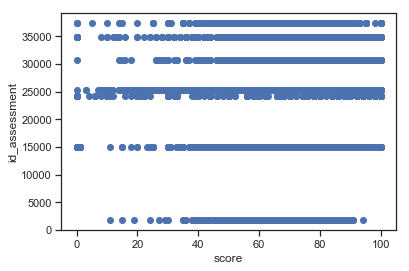

In [33]:
#plot data points to visually see where they are
#on small and distinctive dataset, easier to see clusters
import seaborn as sns; sns.set(style="ticks", color_codes=True)
plt.scatter(modeldf['score'],modeldf['id_assessment'])
plt.title('')
plt.xlabel('score')
plt.ylabel('id_assessment')

In [35]:
#initialize k-means function
#set number of clusters to categorize = 7
kmeans = KMeans(n_clusters=7)

#the model will learn which data points seem similar
#calculates centroids
#classfies data points in clusters based on distance to centroids
#kmeans.fit(X)

#add a new column to dataframe called "cluster"
#can use this toompare features of clusters to original categories
kmeans = KMeans()
X = np.random.rand(100, 2)
km.fit(X)
modeldf['score'] = km.labels_

kmeans = KMeans()
X = np.random.rand(100, 2)
km.fit(X)
print(kmeans.labels_)

#make a dataframe called X to hold the predictive features
X = modeldf.drop('CREDIT_LIMIT', axis=1)
X.head()

In [44]:
def getPctMissing(series):
    num = series.isnull().sum()
    den = series.count()
    return 100*(num/den)

In [45]:
df2.head()

,,id_assessment,id_student,date_submitted,is_banked,score,assessment_type,date,weight,id_course
id_student,,,,,,,,,,
6516,1756,1758,6516,17,0,60.0,TMA,19.0,10.0,AAA-2014J
8462,88494,25362,8462,-1,1,93.0,TMA,20.0,5.0,DDD-2014J
11391,0,1752,11391,18,0,78.0,TMA,19.0,10.0,AAA-2013J
23629,3285,14984,23629,9,0,67.0,TMA,19.0,5.0,BBB-2013B
23698,58648,24295,23698,21,0,78.0,CMA,18.0,2.0,CCC-2014J


# Ready to start phase 2: clean each dataframe
- check that dtypes are appropriate
- check for dups
- check null/NaN/missing values in rows/columns

# Phase 3: merge all dataframes

# Phase 4: export single dataframe (that was cleaned & merged)

In [ ]:
#selection = df_assess_merge_1[df_assess_merge_1['id_student']==537811]
#selection2 = selection.head(15)[5:]
#selection2
#sel3 = selection2.groupby(by='code_module')
#sel3 = sel3.apply(lambda g: g[g['date_submitted'] == g['date_submitted'].min()])
#sel3.head(15)

In [ ]:
#grouped = df_assess_merge_1.groupby(['id_student','code_module'])
#sel4['date_submitted'] = sel4[sel4['date_submitted'].min()]

In [ ]:
#grouped = grouped.filter(lambda x: x['date_submitted'] == x['date_submitted'].min())

In [ ]:
#sel4.head(5)
#sel4.id_student.value_counts()

In [ ]:
#groups = df_assess_merge_1.groupby(by=['id_student'])
#groups = groups.apply(lambda g: g[g['date_submitted'] == g['date_submitted'].min()])

In [ ]:
#groups.head(10)

In [ ]:
#student_reg.dtypes

In [ ]:
#print(student_vle.shape)
#student_vle.head()

In [ ]:
#student_vle.count()

In [ ]:
#student_vle.dtypes

In [ ]:
#print(vle.shape)
#vle.head()

In [ ]:
#vle.dtypes

In [ ]:
#vle.count()

In [20]:
df_student2 = pd.merge(student_info, student_assess, on = "id_student")

In [21]:
df_student2.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_assessment,date_submitted,is_banked,score
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1752,18,0,78.0
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1753,53,0,85.0
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1754,115,0,80.0
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1755,164,0,85.0
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1756,212,0,82.0


In [22]:
student_reg = student_reg.drop(['code_module','code_presentation'], axis=1)
student_vle = student_vle.drop(['date'],axis=1)

In [23]:
df_student = pd.merge(student_vle, student_reg, on="id_student")

In [24]:
df_student.head()

,code_module,code_presentation,id_student,id_site,sum_click,date_registration,date_unregistration
0,AAA,2013J,28400,546652,4,-53.0,NaN
1,AAA,2013J,28400,546652,1,-53.0,NaN
2,AAA,2013J,28400,546652,1,-53.0,NaN
3,AAA,2013J,28400,546614,11,-53.0,NaN
4,AAA,2013J,28400,546714,1,-53.0,NaN


In [29]:
vle = vle.drop(['code_module','code_presentation'], axis=1)

In [30]:
df_student3 = pd.merge(df_student, vle, on="id_site")

In [31]:
df_student3.head()

,code_module,code_presentation,id_student,id_site,sum_click,date_registration,date_unregistration,activity_type,week_from,week_to
0,AAA,2013J,28400,546652,4,-53.0,NaN,forumng,NaN,NaN
1,AAA,2013J,28400,546652,1,-53.0,NaN,forumng,NaN,NaN
2,AAA,2013J,28400,546652,1,-53.0,NaN,forumng,NaN,NaN
3,AAA,2013J,28400,546652,8,-53.0,NaN,forumng,NaN,NaN
4,AAA,2013J,28400,546652,3,-53.0,NaN,forumng,NaN,NaN


In [32]:
assessments = assessments.drop(['code_module','code_presentation'], axis=1)

In [33]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [34]:
df_student4 = pd.merge(df_student2, assessments, on = "id_assessment")

In [35]:
df_student4.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1752,18,0,78.0,TMA,19.0,10.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1752,22,0,70.0,TMA,19.0,10.0
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,1752,17,0,72.0,TMA,19.0,10.0
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1752,26,0,69.0,TMA,19.0,10.0
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,1752,19,0,79.0,TMA,19.0,10.0


In [36]:
df_student4.columns.values

array(['code_module', 'code_presentation', 'id_student', 'gender',
       'region', 'highest_education', 'imd_band', 'age_band',
       'num_of_prev_attempts', 'studied_credits', 'disability',
       'final_result', 'id_assessment', 'date_submitted', 'is_banked',
       'score', 'assessment_type', 'date', 'weight'], dtype=object)

In [37]:
df_student3 = df_student3.drop(['code_module','code_presentation'],axis=1)
df_student3.columns.values

array(['id_student', 'id_site', 'sum_click', 'date_registration',
       'date_unregistration', 'activity_type', 'week_from', 'week_to'],
      dtype=object)

In [ ]:
#df_Final = pd.merge(df_student4, df_student3, on="id_student")

In [ ]:
#df_Final.head()

In [ ]:
#df_Final.dtypes

In [ ]:
#total missing values
#df_Final.isnull().sum()

In [ ]:
#only dataframe with non-null year column values
df_Final = df_Final.loc[df_Final['Date'].notnull()]

#change year column into a string
#need to use string type for getYear function below
df_Final['Date'] = df_Final['Date'].astype(str)